# Linear Regression
## Import the library

In [1]:
import mxnet as mx
import numpy as np

## Preparing the Data

In MXNet, data is input via **Data Iterators**. Here we will illustrate
how to encode a dataset into an iterator that MXNet can use. The data used in the example is made up of 2D data points with corresponding integer labels. 

In [3]:
#Training data
train_data = np.random.uniform(0, 1, [100, 2])
train_label = np.array([train_data[i][0] + 2 * train_data[i][1] for i in range(100)])
batch_size = 1

#Evaluation Data
eval_data = np.array([[7,2],[6,10],[12,2]])
eval_label = np.array([11,26,16])

#Encode a dataset into an iterator
train_iter = mx.io.NDArrayIter(train_data,train_label, batch_size, shuffle=True,label_name='lin_reg_label')
eval_iter = mx.io.NDArrayIter(eval_data, eval_label, batch_size, shuffle=False)

## Defining the Model

In [4]:
#Define the network
X = mx.sym.Variable('data')
Y = mx.symbol.Variable('lin_reg_label')
fully_connected_layer  = mx.sym.FullyConnected(data=X, name='fc1', num_hidden = 1)
lro = mx.sym.LinearRegressionOutput(data=fully_connected_layer, label=Y, name="lro")

#Define the module
model = mx.mod.Module(
    symbol = lro ,
    data_names=['data'],
    label_names = ['lin_reg_label']# network structure
)

We can visualize the network we created by plotting it:

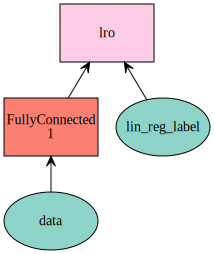

In [5]:
mx.viz.plot_network(symbol=lro)

## Training the model

In [ ]:
model.fit(train_iter, eval_iter,
            optimizer_params={'learning_rate':0.005, 'momentum': 0.9},
            num_epoch=1000,
            batch_end_callback = mx.callback.Speedometer(batch_size, 2))

## Testing the model 

In [14]:
model.predict(eval_iter).asnumpy()

array([[ 10.99998188],
       [ 25.99992371],
       [ 15.99997616]], dtype=float32)

In [15]:
metric = mx.metric.MSE()
print model.score(eval_iter, metric)

[('mse', 2.2391759557649493e-09)]
